### 1. Importing libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings("ignore")

import eda_helper_functions

from sklearn.ensemble import IsolationForest

from IPython.core.display import display, HTML

# CSS to expand the Jupyter Notebook width to 100% and reduce borders
style = """
<style>
    .container {
        width: 100% !important;
    }
    .cell {
        border-width: 1px !important;
        border-style: solid !important;
        border-color: #ccc !important;
    }
    .input_prompt, .output_prompt {
        display: none !important;
    }
    .inner_cell {
        padding: 5px !important;
    }
</style>
"""

# Display the CSS
display(HTML(style))

/Users/abhisheksaurav/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2. Read the Training Data

In [2]:
file_path = f"/Users/abhisheksaurav/Desktop/flight-sagemaker-project/data/train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-09-03,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-12-06,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-12-03,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-01-05,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-01-06,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst = True)
    for col in ["date_of_journey", "dep_time", "arrival_time"]
    
})

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/3428412678.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/3428412678.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/3428412678.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-07-26 08:55:00,2024-07-26 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-26 17:30:00,2024-07-26 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-09-03,Banglore,New Delhi,2024-07-26 11:40:00,2024-07-26 14:35:00,175,0.0,No Info,7305
3,Air India,2019-12-06,Kolkata,Banglore,2024-07-26 09:25:00,2024-07-26 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-12-03,Banglore,New Delhi,2024-07-26 22:55:00,2024-07-26 07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-26 10:45:00,2024-07-26 18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-01-05,Kolkata,Banglore,2024-07-26 09:25:00,2024-07-26 18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-01-06,Delhi,Cochin,2024-07-26 14:00:00,2024-07-26 19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-07-26 07:55:00,2024-07-26 13:25:00,330,1.0,No Info,6152


In [6]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst = True)
    for col in ["date_of_journey", "dep_time", "arrival_time"]
    
})

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/1710255742.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/1710255742.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)
/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_3577/1710255742.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst = True)


### 3. Hight - Level Summary of Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [8]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [9]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include = "O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,12,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2386,2730,2730,3580.0,5249


- Average duration of flights is around 640 mins. 
- Maximum flight duration is 2860 mins. 
- Total Stops is a categorical variable so we will change it into `object`. 
- Average flight costs around 9100. 
- Maximum flight costs around 31000. 
- Most used flight is `Jet Airways`. 
- Most of the flights have `1 Stops`. 

### 4. High Level Analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


In [11]:
# can use missingno as well 

### 5. High Level Analysis for Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
    train
    .dropna(axis=1)
    .drop(columns="price")
    .dropna()  # Drop rows with NaN values
    .assign(outlier=forest.fit_predict(train
                                       .dropna(axis=1)
                                       .drop(columns="price")
                                       .dropna()
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,additional_info,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-07-26 18:55:00,2024-07-26 22:00:00,185,In-flight meal not included,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-07-26 05:45:00,2024-07-26 07:15:00,90,No check-in baggage included,-1
9,Jet Airways,2019-09-05,Delhi,Cochin,2024-07-26 23:05:00,2024-07-26 04:25:00,1760,No Info,-1
10,Jet Airways,2019-12-06,Kolkata,Banglore,2024-07-26 14:05:00,2024-07-26 10:05:00,1200,No Info,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-07-26 21:25:00,2024-07-26 19:00:00,1295,No Info,-1
...,...,...,...,...,...,...,...,...,...
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-07-26 21:25:00,2024-07-26 12:35:00,910,In-flight meal not included,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-07-26 09:10:00,2024-07-26 10:40:00,90,No Info,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-26 10:45:00,2024-07-26 18:50:00,1925,No Info,-1
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-07-26 07:55:00,2024-07-26 13:25:00,330,No Info,-1


### 6. Pair Plots

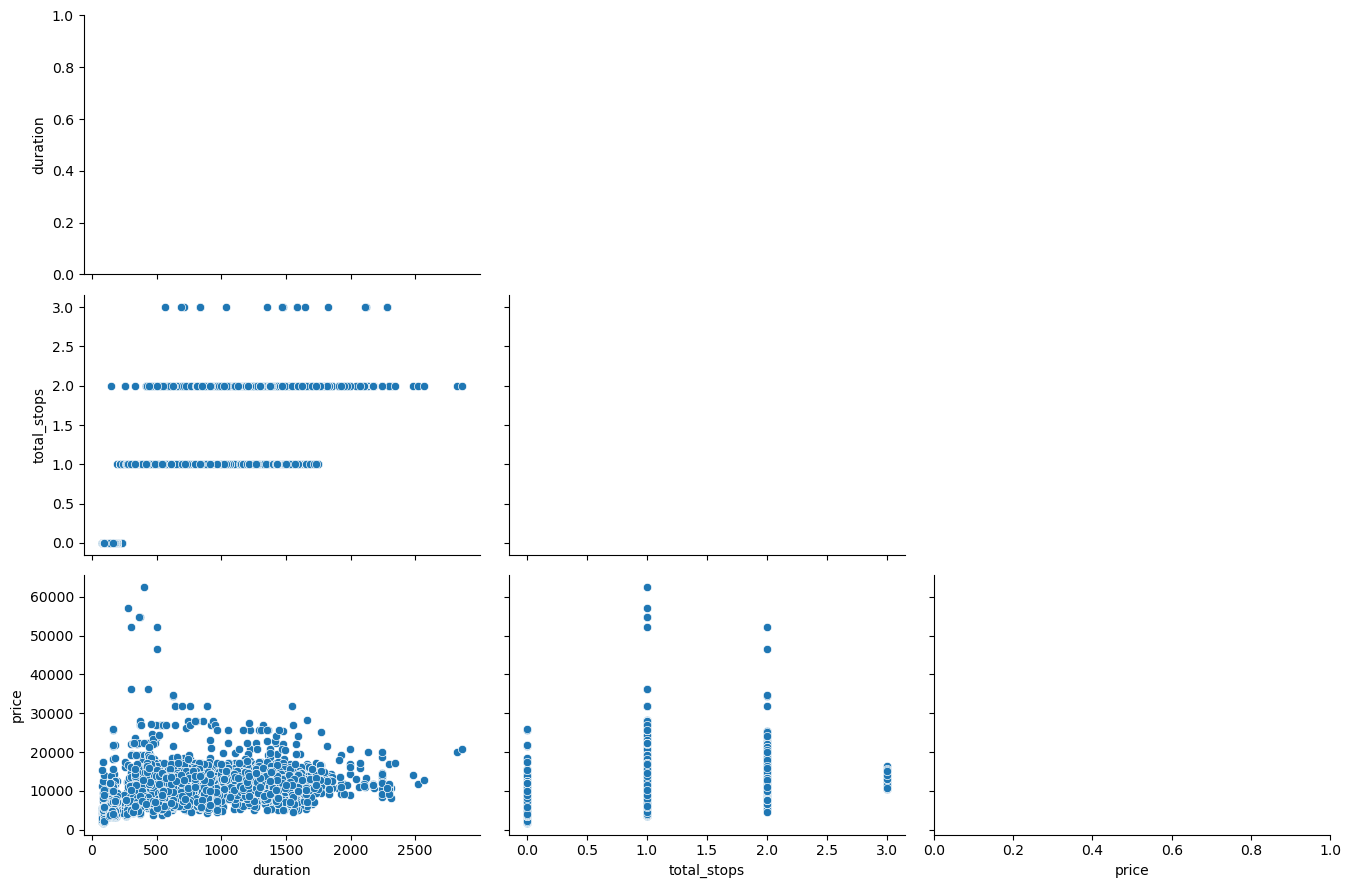

In [14]:
eda_helper_functions.pair_plots(train)

- For each combination pair plot is made. 
- To avoid the repeated information we are just showing the lower half. 
- Flight price is increasing with the duration of the flight. The longer the flights the more expensive the flights are. 
- total_stops: for 0, 1, 2 and 3 the price range are same. 
    - For 1: the lowest the price is around 5000 and it goes almost upto 20000. 
    - For 2 Stops: the price starts at around 5000 and it also goes to almost 20000. 
- Duration Vs Total Stops: If is a direct flight then it is a very short flight but if there are multiple stops then those flights tends to be very long. 


### 7. Correlation Analysis

In [15]:
eda_helper_functions.correlation_heatmap(train)

ValueError: could not convert string to float: 'Jet Airways'

- Here is also showing the lower half only because the upper part is displaying the same information. 

- Between `duration` and `price` there is a correlation of `0.70`. This is a very strong correaltion which means if the duration increases then price also increases. 
This is confirmed with the pair plot and the correlation heatmap

-  There is a very strong correlation between `price` and `total_stops` of `0.72`. This means the price of the flight will increase if there are multiple stops. 

- The strongest relation in the data is in between `total_stops` and `duration`. This means there is a very high collinearity. If we are going to use `Linear Regression` or `Ridge` etc then this feature will create the issue. 

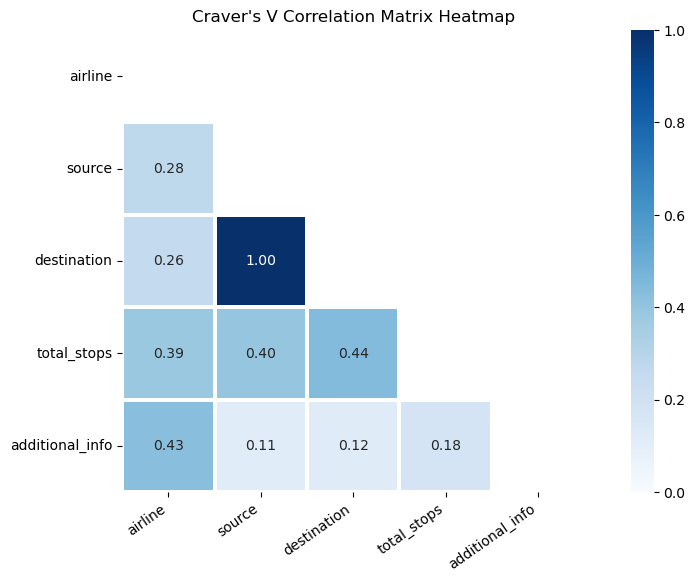

In [16]:
eda_helper_functions.cramerV_heatmap(train
                                    .assign(total_stops = train["total_stops"].astype(object)))

- Correlation between `destination` and `source` is 1 because there is an overlap between these values. Many values are the same that's why it is high. 

### 8. Detailed Analysis

In [17]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### 8.1 Airlines

In [18]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

In [19]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows ( 0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356385
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,730,0.109037
Spicejet,537,0.080209
Vistara,319,0.047647
Air Asia,211,0.031516
Goair,125,0.018671
Multiple Carriers,6,0.000896


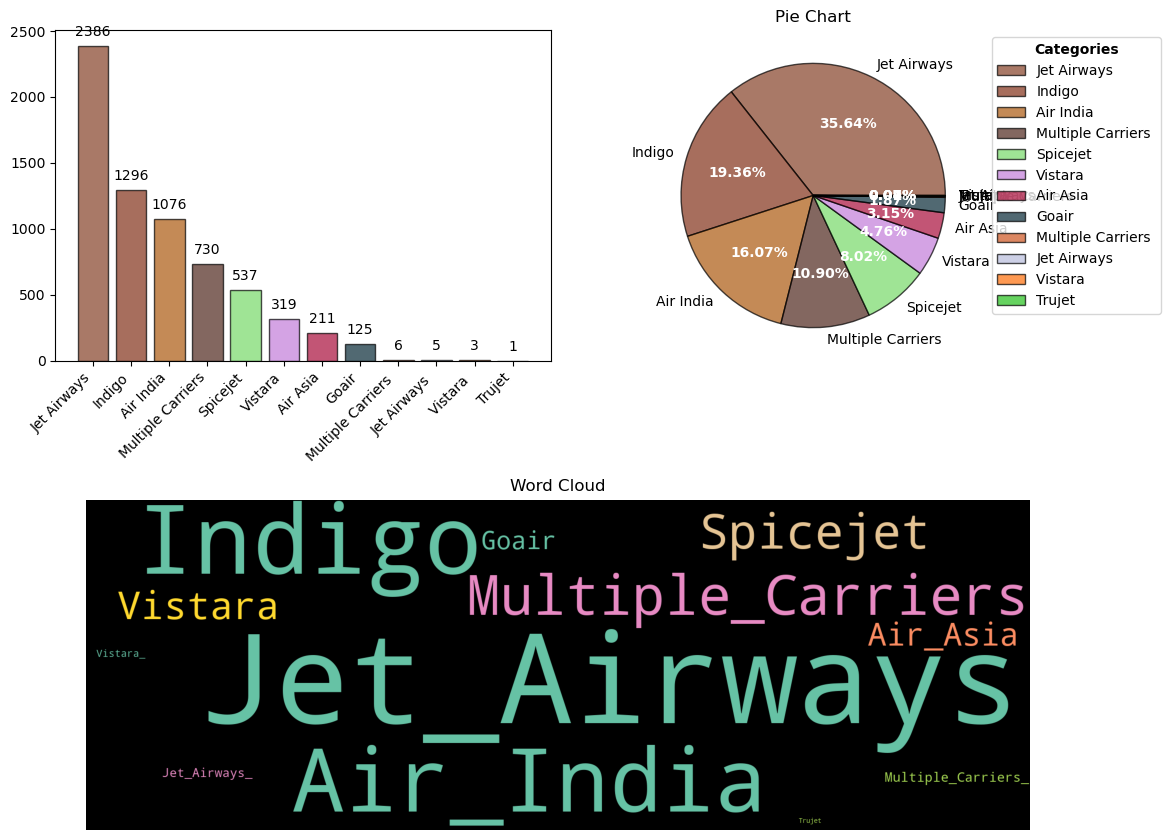

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline")

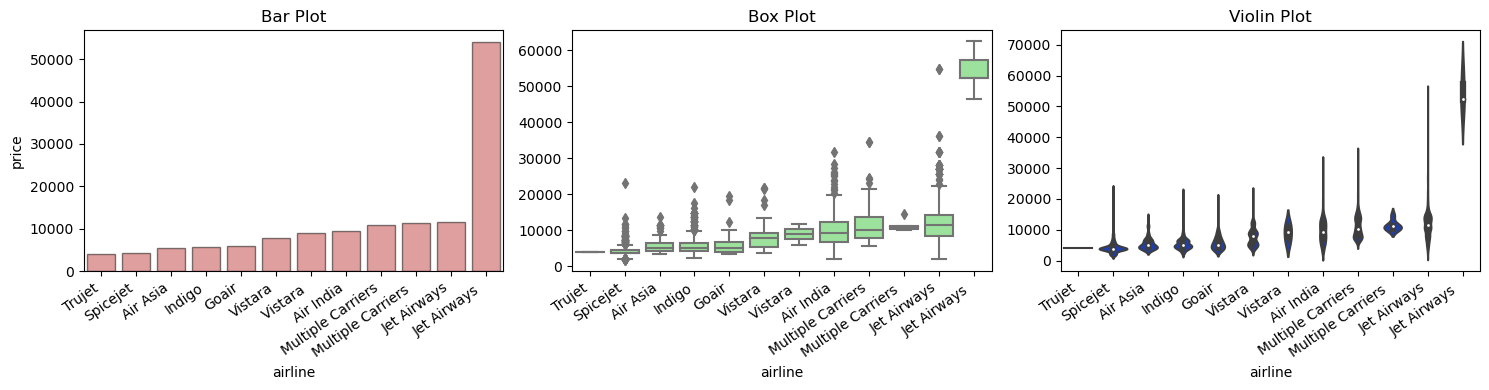

In [21]:
eda_helper_functions.num_cat_bivar_plots(
    data = train, 
    num_var = "price", 
    cat_var = "airline")

- We can see here that prices are varying based on the airline company. so this will be a good feature to predict the prices for the flights. 
- 50% of the `Air India` is in in range of 5000 to 15000 anything more than that is a potential outlier. 
- In the violin plot we can see that the shape is completely different for each categoy. So this confirms that this will be a good predictor for price. 

- With these graphs we observed that there is some relationship between the `airline` and `prices`. To confirm this we will now do the `Hypothesis Testing`. 

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 447.19740641380713
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3137.9739520926496
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


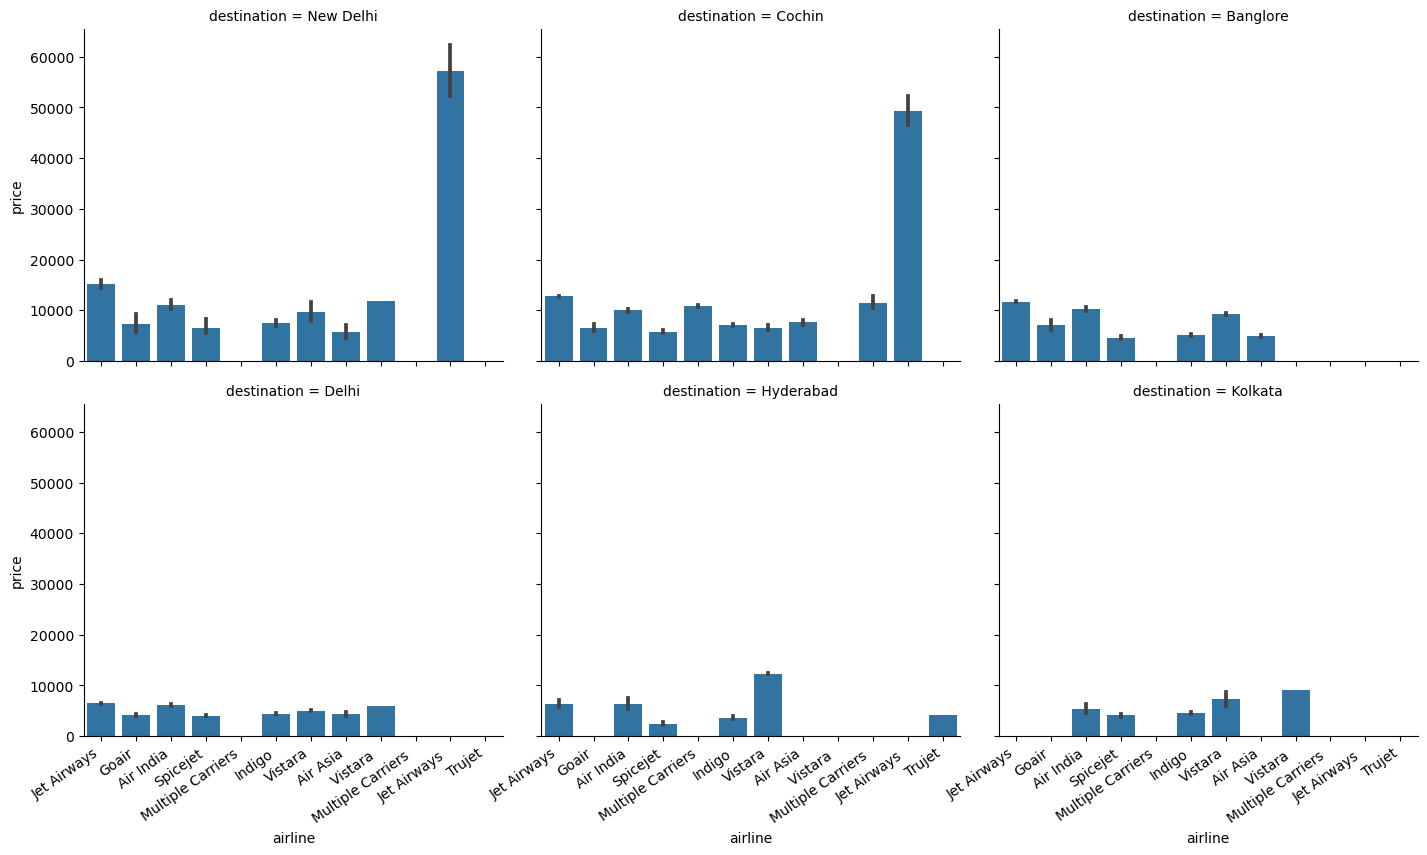

In [23]:
airline_grid = sns.FacetGrid(
    data = train, 
    col = "destination", 
    col_wrap = 3,
    height = 4, 
    aspect = 1.2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

#### 8.2 date_of_journey

In [24]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-09-03
3      2019-12-06
4      2019-12-03
          ...    
6690   2019-03-21
6691   2019-01-05
6692   2019-01-06
6693   2019-06-24
6694   2019-01-03
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

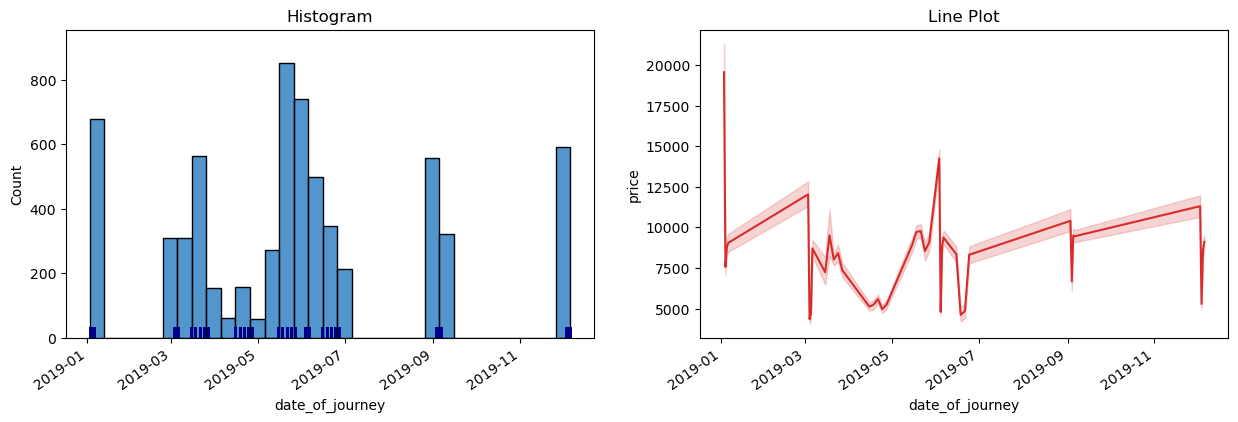

In [25]:
eda_helper_functions.dt_univar_plots(
    data= train, 
    var = "date_of_journey", 
    target = "price"
)

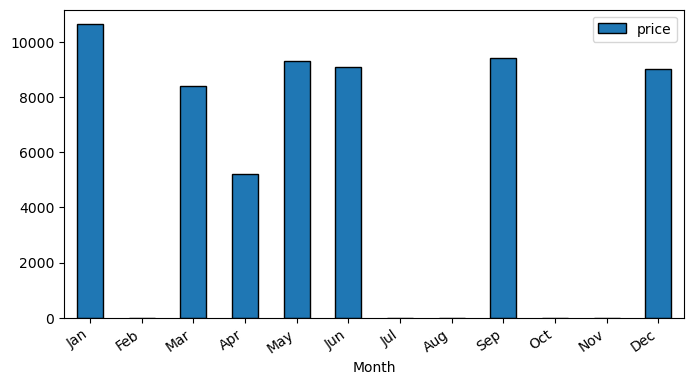

In [26]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
              "Aug", "Sep", "Oct", "Nov", "Dec"], axis = 0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar", 
        figsize=(8, 4), 
        edgecolor= "black"
    )
    
    
    
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

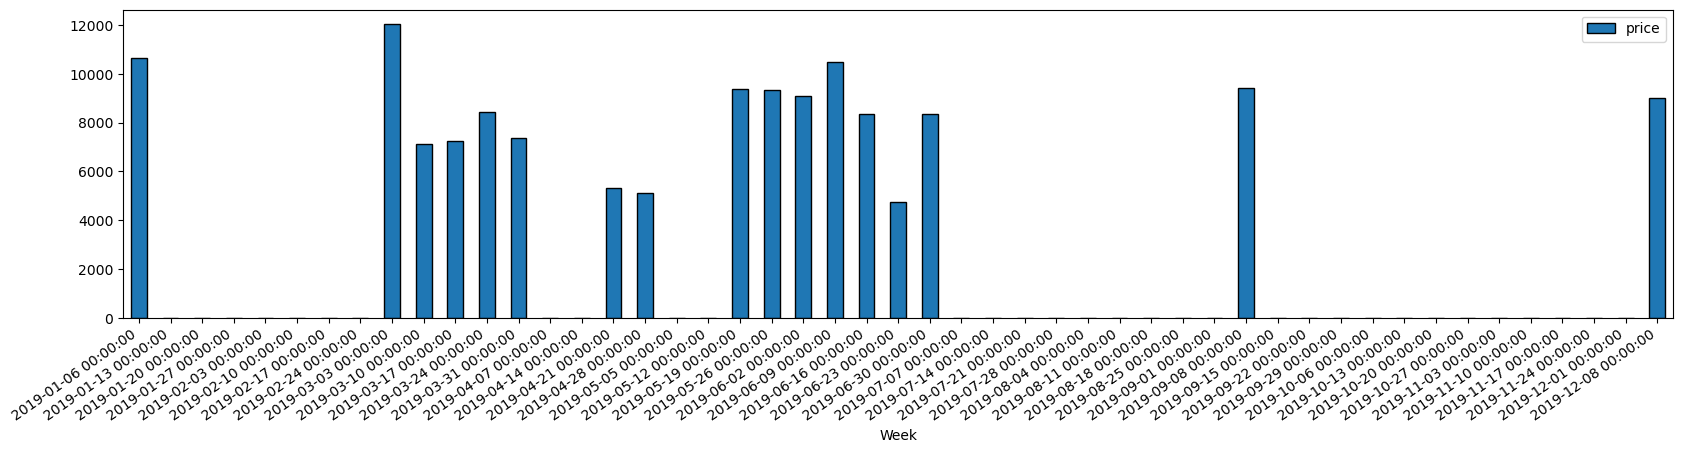

In [27]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "W"))
    .price.mean()
    .to_frame()
    .rename_axis(index = "Week")
    .plot(
        kind = "bar", 
        figsize=(20, 4), 
        edgecolor= "black"
    )
    
    
    
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

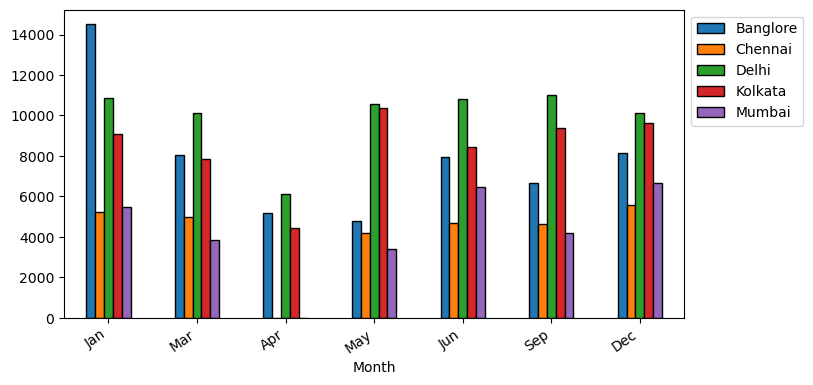

In [28]:
(
    train
    .groupby([pd.Grouper(key  = "date_of_journey", freq = "M"), "source"])
    .price.mean()
    .unstack(fill_value= 0)
    .set_axis(["Jan", "Mar", "Apr", "May", "Jun", "Sep","Dec"], axis = 0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar", 
        figsize=(8, 4), 
        edgecolor= "black"
    )

)

ax = plt.gca()

ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

- `Delhi` has highest fares in every month except January. 
- Flight prices are lower in the month of `April`. 
- `Chennai` and `Mumbai` have comparitively low fares every month. 

#### 8.3 dep_time

In [29]:
(
    train.dep_time
    .dt
    .time
    
)

0       08:55:00
1       17:30:00
2       11:40:00
3       09:25:00
4       22:55:00
          ...   
6690    10:45:00
6691    09:25:00
6692    14:00:00
6693    07:55:00
6694    11:50:00
Name: dep_time, Length: 6695, dtype: object

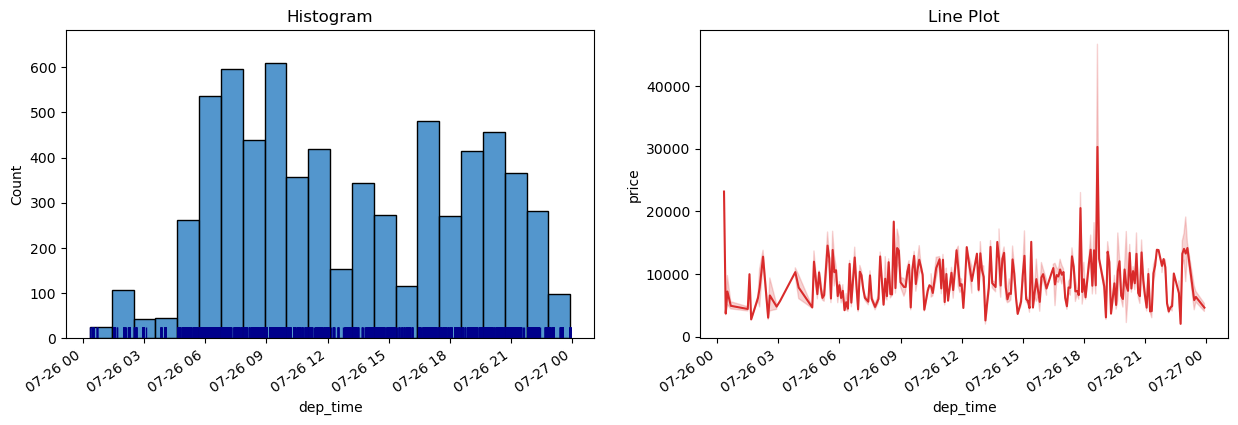

In [30]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

- From `7AM - 12 PM` most of the flights are booked. 
- From `12 PM` to rest of the day count decreases. 
- Early midnight around 12 AM very few flights are booked. 
- Price of flights in between `6 PM - 9 PM` are high.
- Early morning flghts are relatively cheaper. 

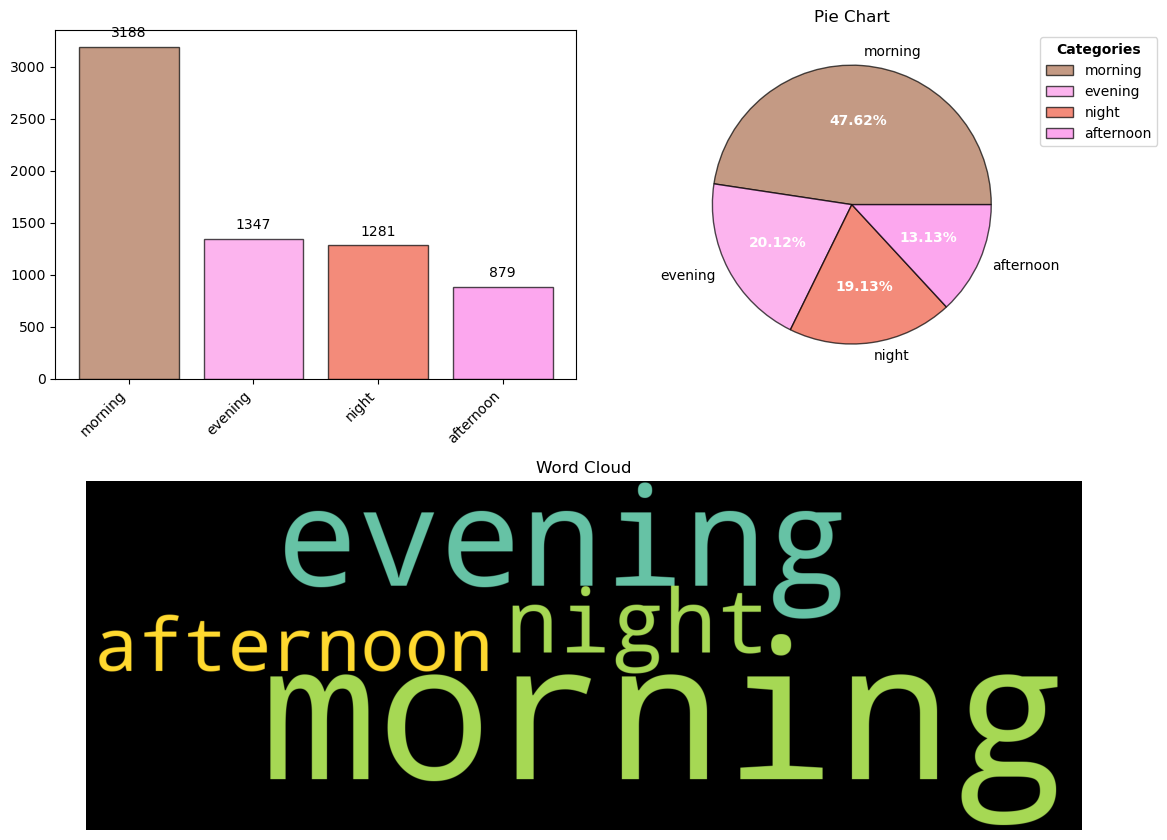

In [31]:
(
    train
    .assign(dep_time = lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive = "left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive = "left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive = "left")],
                  ["morning","afternoon", "evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")

)


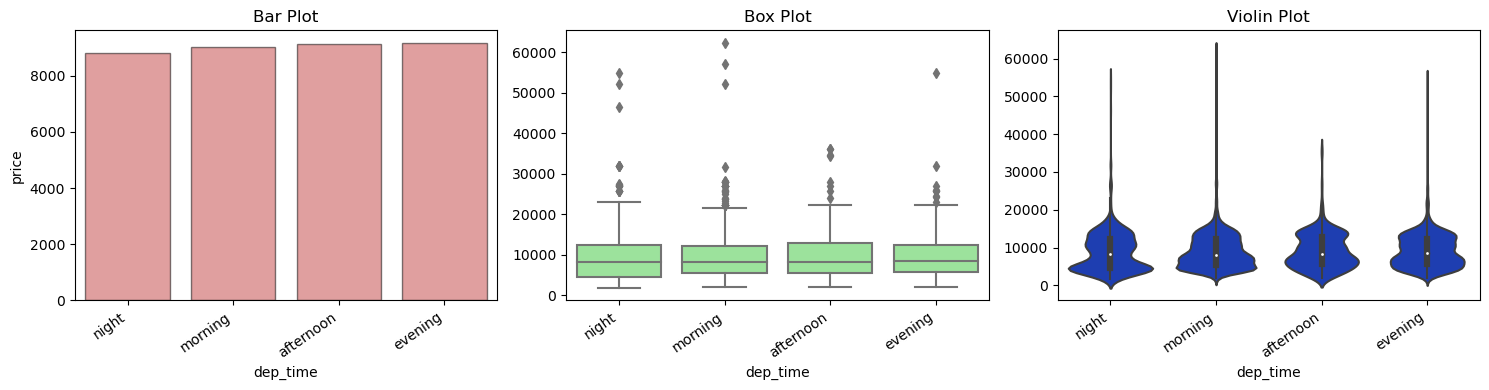

In [32]:
(
    train
    .assign(dep_time = lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive = "left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive = "left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive = "left")],
                  ["morning","afternoon", "evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price",  "dep_time")

)


- Most of the flights are in the `Morning` then `Evening` then `Night` and the least is in the `Afternoon`. 
- The prices of the flights are increasing in the following order: `Night`, `Morning`, `Afternoon`, and then `Evening`.

#### 8.4 arrival_time

In [33]:
(
    train.arrival_time
    .dt
    .time
    
)

0       19:10:00
1       04:25:00
2       14:35:00
3       18:30:00
4       07:40:00
          ...   
6690    18:50:00
6691    18:30:00
6692    19:00:00
6693    13:25:00
6694    08:55:00
Name: arrival_time, Length: 6695, dtype: object

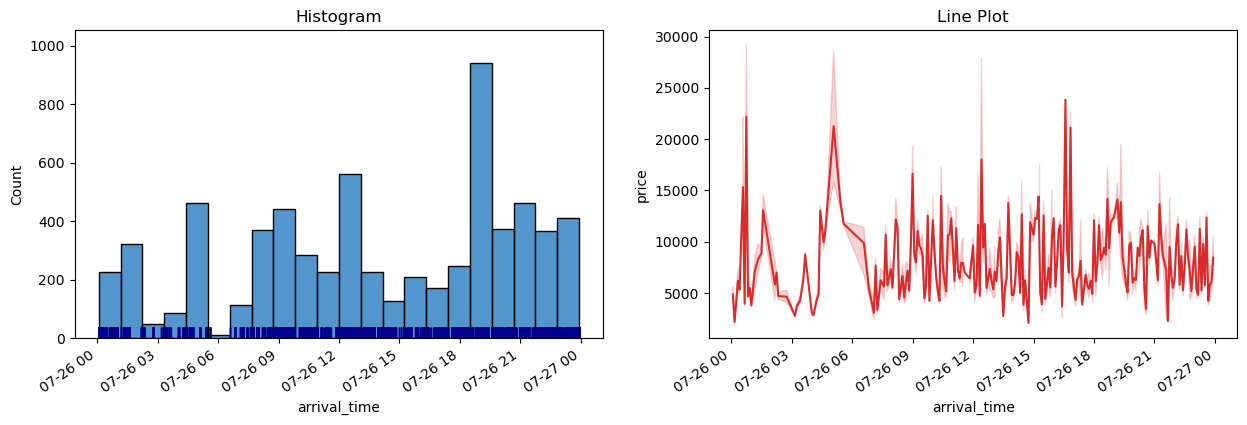

In [34]:
eda_helper_functions.dt_univar_plots(train, "arrival_time", "price")

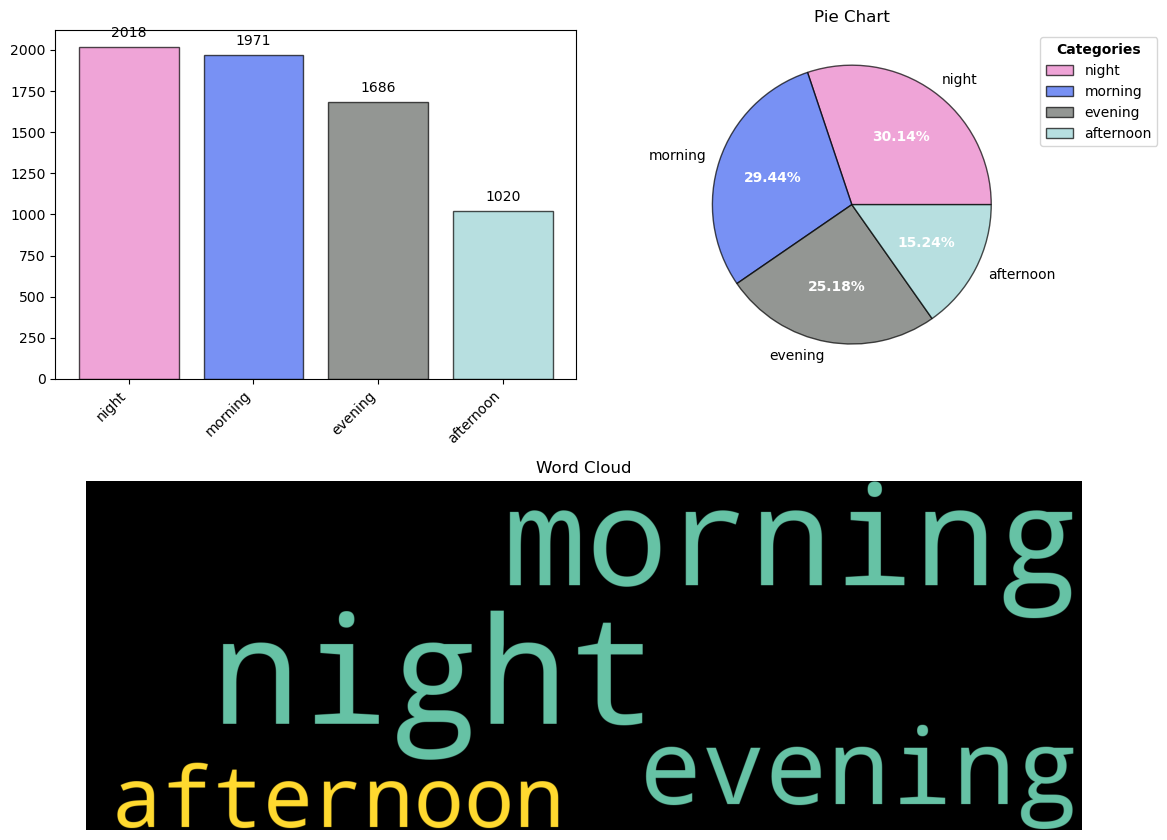

In [35]:
(
    train
    .assign(arrival_time = lambda df_: (
        np.select([df_.arrival_time.dt.hour.between(4,12, inclusive = "left"),
                   df_.arrival_time.dt.hour.between(12, 16, inclusive = "left"),
                   df_.arrival_time.dt.hour.between(16, 20, inclusive = "left")],
                  ["morning","afternoon", "evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.cat_univar_plots, "arrival_time")

)


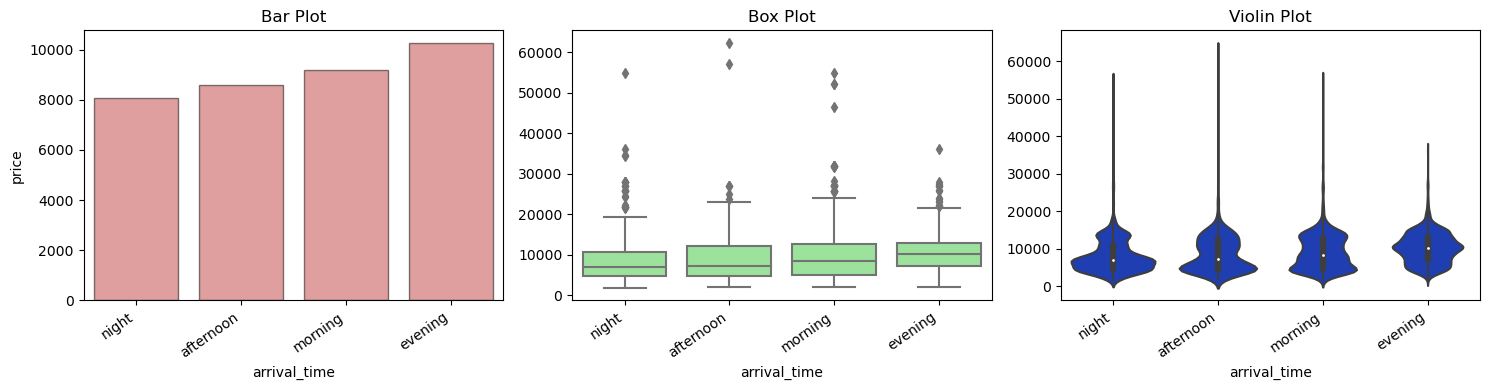

In [36]:
(
    train
    .assign(arrival_time = lambda df_: (
        np.select([df_.arrival_time.dt.hour.between(4,12, inclusive = "left"),
                   df_.arrival_time.dt.hour.between(12, 16, inclusive = "left"),
                   df_.arrival_time.dt.hour.between(16, 20, inclusive = "left")],
                  ["morning","afternoon", "evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price",  "arrival_time")

)


#### 8.5 duration

In [37]:
(
    train
    .duration
)

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [38]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865612745285034
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


- The shortest flight duration is `75 minutes`.
- `10%` of the flights are less than `150 minutes`.
- `50%` of the flights are less than `500 minutes`.
- Half the flights are longer than `8 hours`, indicating extremely long flights in our dataset.
- On average, the flight duration is around `630 minutes`.
- Since the mean is highly impacted by outliers, we also consider the trimmed mean. The trimmed mean, which ignores the lower `5%` and top `5%` values, indicates that the average flight duration is `600 minutes`. Ignoring more end values would bring the trimmed mean closer to the median.
- The standard deviation indicates that the average duration of the flights deviates by `± 500 minutes` from the mean.
- The data might be positively skewed, as confirmed by the mean being greater than the median.
- The kurtosis is close to `0`, indicating smaller peaks and tails.
- Both the Shapiro-Wilk test and the Anderson-Darling test confirm that the data is not normally distributed, as evidenced by the mean being much greater than the median, indicating skewness in the data.

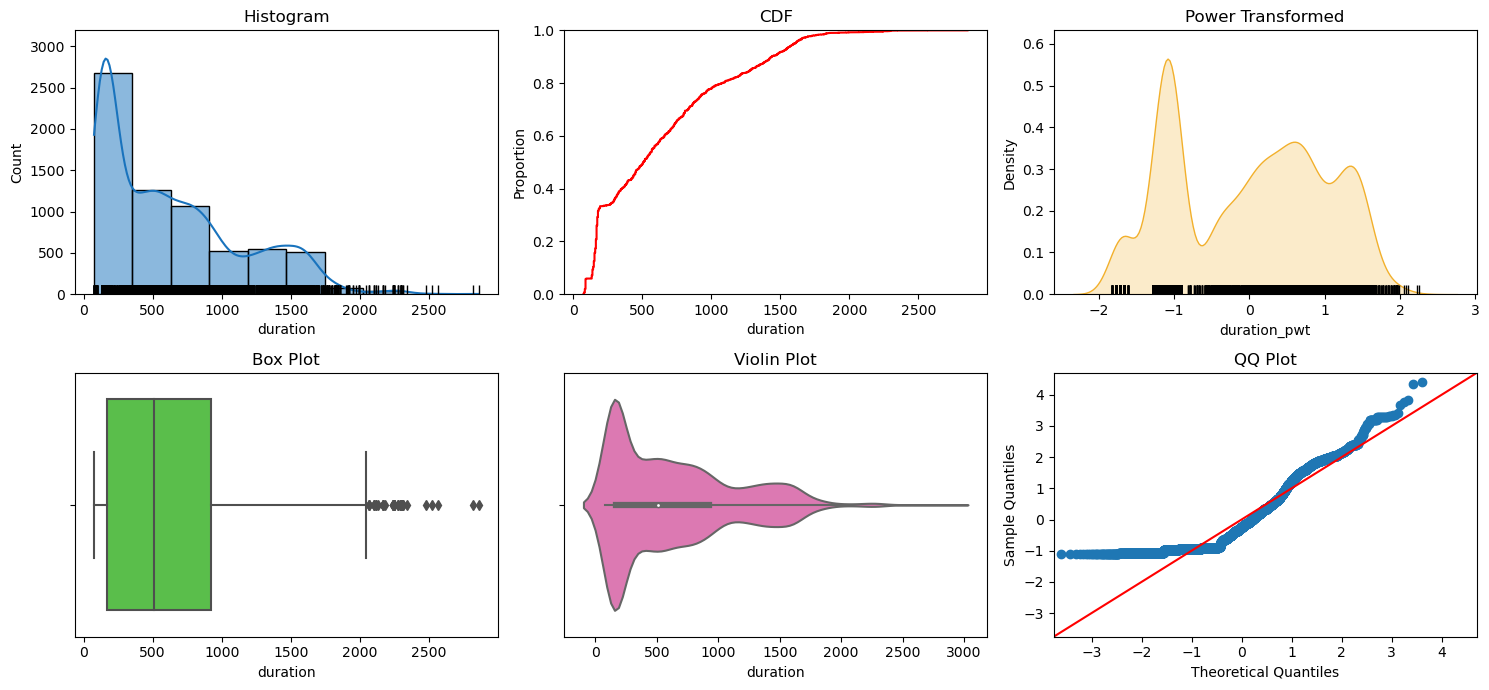

In [39]:
eda_helper_functions.num_univar_plots(train, "duration")

- Most of the flights have short duration, indicated by the tallest bar at the lower end.
- Very few flights have longer durations; there are only `four flights` above `2500 minutes`.
- From the CDF, we observed that around `80%` of the flights' duration is less than `1000 minutes`.
- Power transformation makes our feature as symmetric as possible.
- The QQ plot shows that our data does not follow a theoretical distribution, as the points do not follow a straight line, indicating that our feature is not normally distributed.
- Our feature is skewed and not normally distributed.

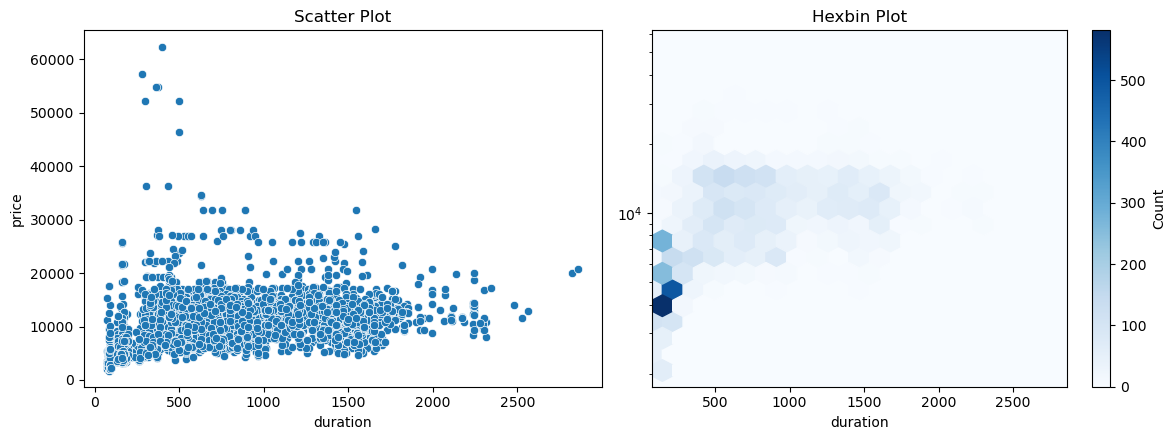

In [40]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration", 
    "price",
    hexbin_kwargs = dict(
        yscale = "log", 
        gridsize= 20, 
        cmap = "Blues"
    )
)

In [41]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5090124491778996
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


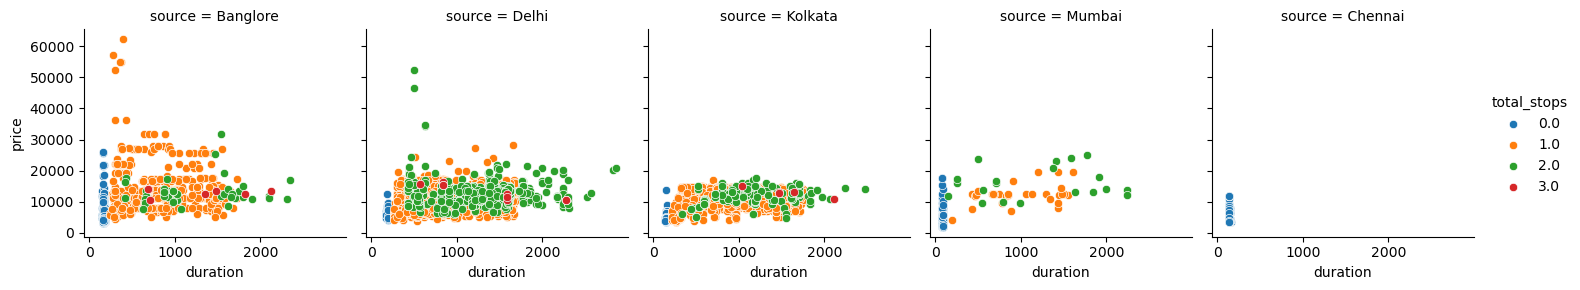

In [43]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    hue = "total_stops",
    # row = "additional_info",
    sharey = True
)

duration_grid.map(sns.scatterplot, "duration", "price")
duration_grid.add_legend()

- From the hexbin plot, we can see that the maximum flights are around 5000 INR and 300 minutes.
- From Chennai, we have only short-duration flights.	
- From Chennai, we only have direct flights.
- From Mumbai, we also have mostly direct flights; other cities have all sorts of flights.

In [44]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -958.75
Upper Limit : 2051.25


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-01-05,Kolkata,Banglore,2024-07-26 05:50:00,2024-07-26 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-06-03,Delhi,Cochin,2024-07-26 17:55:00,2024-07-26 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-06-03,Delhi,Cochin,2024-07-26 17:55:00,2024-07-26 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-07-26 11:05:00,2024-07-26 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-07-26 11:05:00,2024-07-26 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-07-26 11:05:00,2024-07-26 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-12-05,Kolkata,Banglore,2024-07-26 12:00:00,2024-07-26 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-12-03,Banglore,New Delhi,2024-07-26 06:45:00,2024-07-26 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-06-03,Delhi,Cochin,2024-07-26 16:50:00,2024-07-26 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-06-03,Delhi,Cochin,2024-07-26 07:05:00,2024-07-26 19:15:00,2170,2.0,No Info,11552


#### Additonal Info

In [45]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows ( 0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,7
top,No Info
freq,5249


,count,percentage
category,,
No Info,5249,0.784018
In-flight meal not included,1215,0.181479
No check-in baggage included,207,0.030919
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


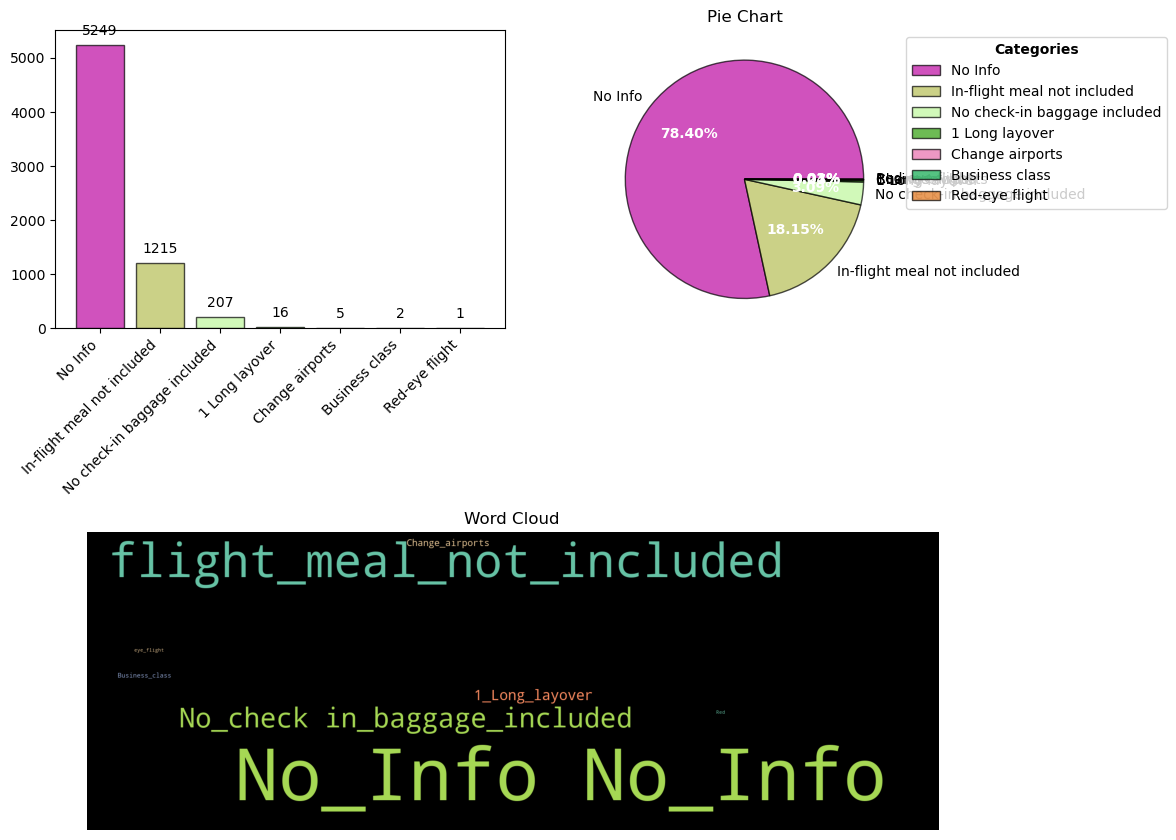

In [46]:
eda_helper_functions.cat_univabbbr_plots(train, "additional_info")

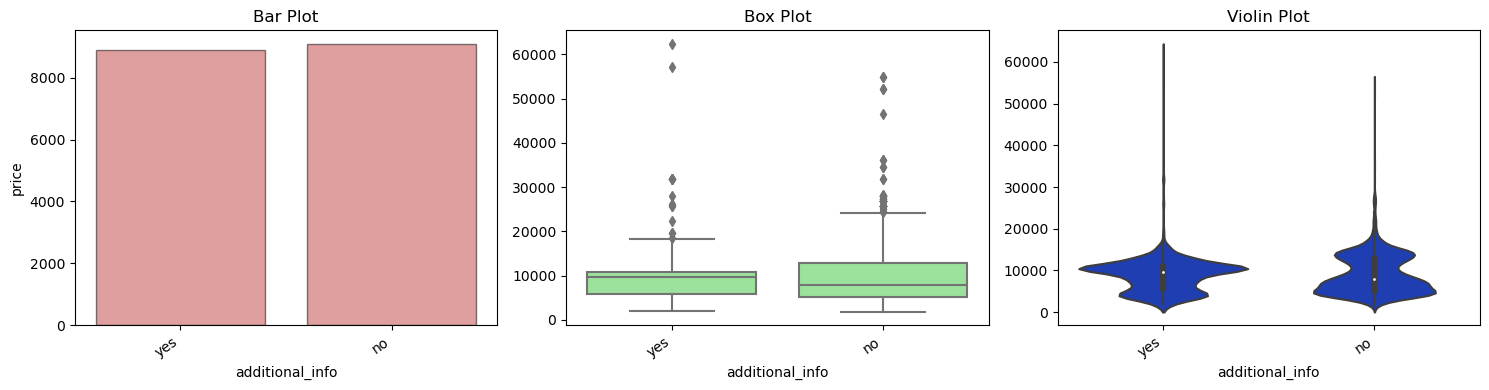

In [47]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

### 9. Automated EDA

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(train)